# Vector Database Demo

A vector database allows for efficient similarity searches by managing a data structure on behalf of the user that defines a distant between any two vectors. This allows the user to query the database for similar vectors given an input vector. In this notebook, we'll see how to use the Hyrax to work with the built in vector database.

As usual, we'll start by creating an instance of a `Hyrax` object and then quickly `train` the default HyraxAutoencoder. After than we'll run some data through `infer` to produce our encoded vectors.

In [1]:
from hyrax import Hyrax

h = Hyrax()

[2025-05-20 14:59:59,703 hyrax:INFO] Runtime Config read from: /home/drew/code/hyrax/src/hyrax/hyrax_default_config.toml


In [2]:
h.config["train"]["epochs"] = 25
h.train()
h.infer()

[2025-05-20 15:00:12,510 hyrax.models.model_registry:INFO] Using criterion: torch.nn.CrossEntropyLoss with default arguments.
2025-05-20 15:00:12,568 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.hyr': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x7fccbe457350>, 'batch_size': 512, 'shuffle': False, 'pin_memory': True}
2025-05-20 15:00:12,569 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.hyr': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x7fccbe1b8440>, 'batch_size': 512, 'shuffle': False, 'pin_memory': True}
/home/drew/miniconda3/envs/hyrax/lib/python3.12/site-packages/ignite/handlers/tqdm_logger.py:127: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2025/05/20 15:00:12 INFO mlflow.system_metrics.

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

[2025-05-20 15:04:14,099 hyrax.pytorch_ignite:INFO] Total training time: 241.28[s]
[2025-05-20 15:04:14,100 hyrax.pytorch_ignite:INFO] Latest checkpoint saved as: /home/drew/code/hyrax/docs/pre_executed/results/20250520-150004-train-Is49/checkpoint_epoch_25.pt
[2025-05-20 15:04:14,100 hyrax.pytorch_ignite:INFO] Best metric checkpoint saved as: /home/drew/code/hyrax/docs/pre_executed/results/20250520-150004-train-Is49/checkpoint_25_loss=-91.8765.pt
2025/05/20 15:04:14 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/05/20 15:04:14 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2025-05-20 15:04:14,115 hyrax.train:INFO] Finished Training
[2025-05-20 15:04:14,391 hyrax.model_exporters:INFO] Exported model to ONNX format: /home/drew/code/hyrax/docs/pre_executed/results/20250520-150004-train-Is49/example_model_opset_20.onnx
[2025-05-20 15:04:22,593 hyrax.models.model_registry:INFO] Using crit

  1%|1         | 1/98 [00:00<?, ?it/s]

[2025-05-20 15:04:33,962 hyrax.pytorch_ignite:INFO] Total evaluation time: 11.07[s]
[2025-05-20 15:04:34,088 hyrax.verbs.infer:INFO] Inference Complete.
[2025-05-20 15:04:34,143 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-20 15:04:34,144 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-20 15:04:37,769 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.


Now we'll use the output of inference to populate a ChromaDB vector database. By default `h.save_to_database()` will find the most recent output from `h.infer()` to use as the inputs when filling the database, but the user can specify a different dataset. Likewise, the default behavior is to create a new directory to store the vector database, but this can also be specified.

`h.save_to_database([input_dir="/path/to/input",] [output_dir="/path/to/output"])`

Note: If the goal is to add more data to an existing database, provide the existing database directory as the `output_dir` when calling `h.save_to_database`.

In [3]:
print(f"Filling a {h.config['vector_db']['name']} database with the results of inference.")
h.save_to_database()

Filling a chromadb database with the results of inference.


[2025-05-20 15:04:46,286 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-20 15:04:46,287 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-20 15:04:46,288 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-05-20 15:04:54,737 hyrax.verbs.save_to_database:INFO] Number of inference result batches to index: 98.
100%|██████████| 98/98 [00:12<00:00,  8.06it/s]


Now that the vector database has been populated, it can be used for similarity search and nearest neighbors. First we'll need to establish a connection using `h.database_connection()`.

With the connection established, we have access to three types of queries:
* `get_by_id` to retrieve the vector associated with a particular id
* `search_by_id` to retrieve the _k_ nearest neighbors to a particular id
* `search_by_vector` to retrieve the _k_ nearest neighbors to a particular input vector

In [4]:
conn = h.database_connection()

### `get_by_id`

With `get_by_id` we can retrieve the vectors associated with some ids. The result is a dictionary where the keys are id strings and values are the numpy array vectors stored in the vector database.

In [5]:
results = conn.get_by_id(ids=["334", "19022"])

for k, v in results.items():
    print(f"Id: {k}, Vector: {v}")

Id: 334, Vector: [ 0.21406414  4.38409519  0.49727368 -0.7893768  -2.87350202  0.11476225
  1.8274399  -0.09784815 -1.2193296  -0.77086699  1.34052861  1.65932298
 -2.07148337 -2.34664512  2.28803968  0.86179125  0.86639947 -2.3657589
 -1.03186095  1.59934366 -0.38279176 -0.92782491 -1.26808596  1.49409449
 -2.36837769 -2.97786927 -1.81079423 -1.38344455 -1.11257839  1.33133769
  0.86067116 -2.94752669  0.02824669  1.38922858 -0.20957161 -0.15272772
  0.01273713 -0.05502158 -0.28467956 -0.06139451 -1.35991454 -0.46939212
 -1.15573668 -3.90672135  1.14438629  4.01489925  0.87542021 -1.55964196
 -0.27592164  1.35570014 -0.8417064   0.40743572 -0.45822605  0.36299995
 -4.36139441 -0.92870319  1.6725179  -0.35636529  0.2801117  -1.55952835
 -2.01857901  0.28982323 -2.65234852  2.10563254]
Id: 19022, Vector: [ 1.01997221  3.27541471  0.07880742  0.40190896 -2.069767    0.22248952
  0.63698471  0.91667783 -1.42546344 -0.78596801  1.58609724  0.09808031
 -2.03873038 -1.99726641  1.99178457  0

### `search_by_id`

Now we'll search for nearest neighbors. First we search for the _k_ nearest neighbors of using an id from the database. Note that the closest of the 5 neighbors is the vector itself, since it's in the database. The returned dictionary contains the ids of the nearest neighbors in order of increasing distance.

In [6]:
conn.search_by_id("19022", k=5)

{'19022': ['19022', '431', '30105', '4532', '27167']}

### `search_by_vector`

We can repeat the search this time using the vector that we found when running `get_by_id`. The results from this search should match the previous results from `search_by_id`. Again, the returned dictionary contains the ids of the nearest neighbors in order of increasing distance.

Note that the input vector to `search_by_vector` is a list of vectors. Also the input vectors don't need to be vectors extracted from the database. For example - if a new piece of data was run through `infer`, the resulting vector could be passed as input to `search_by_vector` to find similar data. This is why the keys of the returned dictionary are integers, they are the indexes of the input vectors.

In [7]:
neighbors = conn.search_by_vector([results["19022"]], k=5)
neighbors

{0: ['19022', '431', '30105', '4532', '27167']}

We have now successfully queried our vector database. Let's take a look at the nearest neighbors that were found for the example image. First we'll get an interactive copy of the original dataset, and write a couple of helpful plotting functions so that we can plot the original images.

In [8]:
dataset = h.prepare()

[2025-05-20 15:05:15,134 hyrax.prepare:INFO] Finished Prepare


The following is some boilerplate code for displaying either a single image or a collection of images from `dataset`.

In [9]:
import numpy as np
from matplotlib import pyplot as plt


def show_image(data):
    image = data["image"]
    title = f"Label: {data['label']}, Id: {data['object_id']}"
    image = image.permute(1, 2, 0).numpy()
    min_val = np.min(image)
    max_val = np.max(image)
    image = (image - min_val) / (max_val - min_val)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()


def show_image_grid(data_list):
    """
    Display a grid of images.

    Parameters
    ----------
    data_list : list
        A list of data dictionaries, each containing an 'image' key and optionally 'label' and 'object_id'.
    """
    rows = int(len(data_list) / 4)
    if len(data_list) % 4 != 0:
        rows += 1
    cols = 4
    if rows == 1:
        cols = len(data_list)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()  # Flatten the axes for easy iteration

    for ax, data in zip(axes, data_list):
        image = data["image"]
        title = f"Label: {data.get('label', 'N/A')}, Id: {data.get('object_id', 'N/A')}"
        image = image.permute(1, 2, 0).numpy()
        min_val = np.min(image)
        max_val = np.max(image)
        image = (image - min_val) / (max_val - min_val)  # Normalize to [0, 1]
        ax.imshow(image)
        ax.set_title(title)
        ax.axis("off")

    # Turn off any unused axes
    for ax in axes[len(data_list) :]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

First we'll display the image that we used for searching.

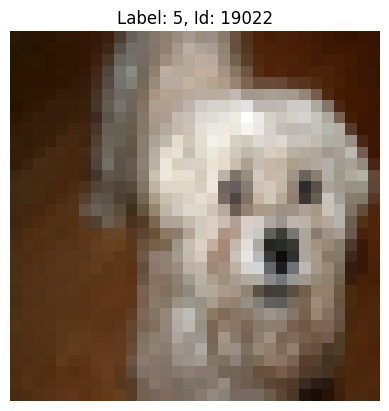

In [10]:
show_image(dataset[19022])

Next we'll display the 4 nearest neighbors. We'll exclude the absolute nearest neighbor, because in our case, that is the original search image. It seems that the model is doing something vaguely reasonable. By eye, some of the nearest neighbors appear similar to the original search image. Though, clearly, there is room for model improvement.

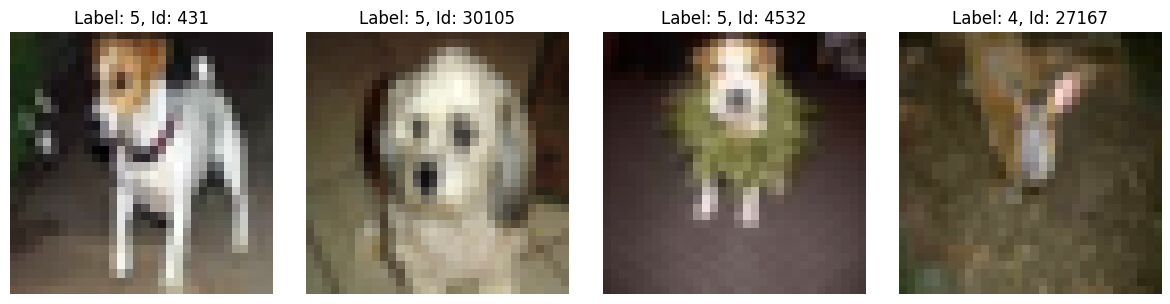

In [11]:
data_list = [dataset[int(n)] for n in neighbors[0][1:]]
show_image_grid(data_list)